<a href="https://colab.research.google.com/github/chaitalimazumder/The-Sparks-Foundation-Task2/blob/main/TheSparksFoundation_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Sparks Foundation**
GRIP September 2021 Batch
#Author: **Chaitali Mazumder**

#**Task 2 : Prediction using Unsupervised Machine Learning**

**2. From 'Iris' dataset , predict the optimum number of clusters and represent it visually.**

In this task , we have to find the optimal number of clusters and represent it visually. So to find optimum no. of cluster, we will use the **Elbow method** and then we will represent it viually with the help of 
**K-Means Clustering Algorithm** .

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#Read dataset
iris = pd.read_csv('/content/Iris (1).csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**What is the value of K in K-Means Clustering Algorithm?**

**Elbow Method helps to determine the optimum no. of clusters**

In [ ]:
type(iris)

pandas.core.frame.DataFrame

In [ ]:
#Converting dataset from pandas DataFrame(iris) to numpy array(x)
x = iris.iloc[:, [0, 1, 2, 3]].values
type(x)

numpy.ndarray

In [ ]:
#To find the optimum number of clusters for K-Means , Elbow method is used.
#Elbow Method
x = iris.iloc[:, [0, 1, 2, 3]].values
WSS = []
cluster_range = range(1,10)

for k in cluster_range:
  km = KMeans(n_clusters=k)
  km.fit(x)
  inertia = km.inertia_
  WSS.append(inertia)

print(WSS)

[281831.54466666665, 70581.3808, 31320.711199999998, 17762.657226173542, 11432.51325101965, 7959.861830546266, 5911.077144174666, 4548.695801857585, 3566.4724844771245]


**Visualization of the Elbow Method**

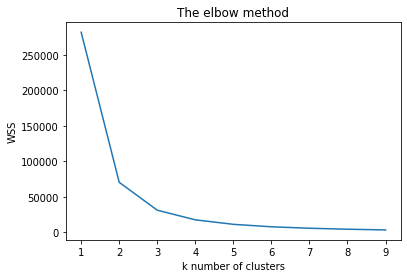

In [ ]:
plt.title('The elbow method')
plt.xlabel('k number of clusters')
plt.ylabel('WSS')       # Within cluster sum of squares
plt.plot(cluster_range,WSS)
plt.show()

**From the above graph, the optimum clusters is where the elbow occurs.So we get the number of cluster [k = 3]** 

#**K - Means Clustering**

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#We need any two columns to visualize the clusters, so we need to drop / delete other columns
new_iris = iris.drop(['PetalLengthCm','PetalWidthCm','Species'],axis='columns')
new_iris.head()

,Id,SepalLengthCm,SepalWidthCm
0,1,5.1,3.5
1,2,4.9,3.0
2,3,4.7,3.2
3,4,4.6,3.1
4,5,5.0,3.6


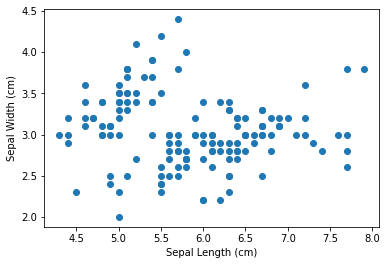

In [ ]:
#Visualize datapoints
plt.scatter(new_iris['SepalLengthCm'],new_iris['SepalWidthCm'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

**Applying K-Means to the dataset**

In [ ]:
km = KMeans(n_clusters=3)
km.fit(new_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = km.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
km.cluster_centers_

array([[ 25.        ,   5.00612245,   3.42040816],
       [125.        ,   6.57058824,   2.97058824],
       [ 74.5       ,   5.922     ,   2.78      ]])

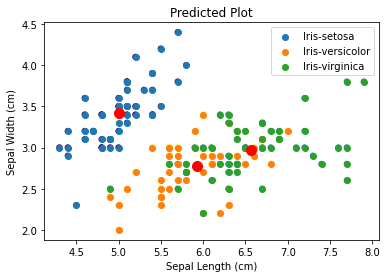

In [ ]:
# Visualising the clusters on the first two columns
plt.scatter(new_iris['SepalLengthCm'],new_iris['SepalWidthCm'],30,labels)

#Legend
for a,b in iris.groupby('Species'):
  plt.scatter(b['SepalLengthCm'],b['SepalWidthCm'],label = a)

#Plot Centroid points
for i in km.cluster_centers_:
    plt.scatter(i[1],i[2],100,marker='o',color='red')

plt.title('Predicted Plot')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

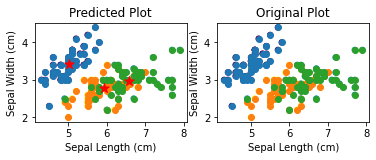

In [ ]:
#Predicted Plot VS Original Plot
plt.subplot(221)
# Visualising the clusters on the first two columns
plt.scatter(new_iris['SepalLengthCm'],new_iris['SepalWidthCm'],30,labels)

#Legend
for a,b in iris.groupby('Species'):
  plt.scatter(b['SepalLengthCm'],b['SepalWidthCm'],label = a)

#Plot Centroid points
for i in km.cluster_centers_:
    plt.scatter(i[1],i[2],100,marker='*',color='red')

plt.title('Predicted Plot')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
# plt.legend()

plt.subplot(222)
#Original Plot
plt.scatter(iris['SepalLengthCm'],new_iris['SepalWidthCm'],30,labels)

#Legend
for a,b in iris.groupby('Species'):
  plt.scatter(b['SepalLengthCm'],b['SepalWidthCm'],label = a)
plt.title('Original Plot')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
# plt.legend()
plt.show()